#**AWS**

####**Assignment Questions**


###1. Explain the difference between AWS Regions, Availability Zones, and Edge Locations. Why is this important for data analysis and latency-sensitive applications?

Ans-1. Amazon Web Services (AWS) structures its global infrastructure to provide high availability, fault tolerance, low latency, and compliance. This structure is built upon three key concepts: Regions, Availability Zones (AZs), and Edge Locations.

####Here's a breakdown of each and why they are critical for data analysis and latency-sensitive applications:

1. **AWS Regions**

* What they are: An AWS Region is a large, geographically distinct area where AWS has clustered multiple data centers. Each Region is entirely independent and isolated from other Regions, ensuring fault isolation. AWS currently operates dozens of Regions worldwide (e.g., us-east-1 (N. Virginia), eu-west-1 (Ireland), ap-south-1 (Mumbai)).

####Key Characteristics:

* **Geographical Separation:** Regions are spread across the globe to bring services closer to users in different parts of the world.
Isolation: Each Region is a self-contained unit. A failure in one Region will not impact services in another.

* **Independent Services:** Most AWS services are Region-scoped, meaning you deploy them within a specific Region.

* **Compliance and Data Sovereignty:** This is a crucial aspect. Data stored in a specific AWS Region generally remains within that Region unless explicitly moved by the user. This helps organizations meet data residency requirements and regulatory compliance (e.g., GDPR in Europe, local data storage laws).
Importance for Data Analysis and Latency-Sensitive Applications:
Data Sovereignty and Compliance: For data analysis, especially with sensitive data, organizations often have strict regulatory requirements that mandate where data can be stored and processed (e.g., financial data in the EU must stay in the EU). Choosing the correct Region ensures compliance.

* **Proximity to Data Sources and Users:** Placing your data analysis infrastructure (e.g., data lakes, analytical databases) in a Region geographically close to your data sources reduces the latency for data ingestion. Similarly, for latency-sensitive applications, deploying in a Region near your primary user base minimizes the time it takes for users to interact with your application, leading to a better user experience.

* **Disaster Recovery:** By deploying critical data analysis workloads across multiple Regions, you can implement robust disaster recovery strategies. If an entire Region becomes unavailable due to a major disaster, you can failover to a different Region, ensuring business continuity.
Cost Optimization: While not directly related to performance or analysis, pricing for AWS services can vary across Regions. This allows organizations to choose Regions that offer a better cost-performance ratio for their data analysis workloads.

2. **Availability Zones (AZs)**

* **What they are:** An Availability Zone (AZ) is one or more discrete data centers within a single AWS Region. Each Region consists of multiple, isolated AZs (typically at least three). AZs within a Region are physically separated by a meaningful distance (e.g., kilometers, not just meters) to minimize the risk of a single event (like a power outage, flood, or fire) impacting multiple AZs, but they are close enough for low-latency network connectivity.

####Key Characteristics:

* **Isolation:** Each AZ has independent power, cooling, networking, and physical security. This isolation prevents single points of failure within a Region.

* **Low-Latency Interconnectivity:** All AZs within a Region are interconnected with high-speed, low-latency, redundant fiber optic networking. This enables synchronous replication and allows applications to seamlessly failover between AZs.

* **Fault Tolerance:** If one AZ experiences an outage, your application can continue to run in other healthy AZs within the same Region.

* **Importance for Data Analysis and Latency-Sensitive Applications:**
High Availability and Fault Tolerance: This is paramount. For data analysis, you want your data pipelines, analytical databases, and processing clusters to be continuously available. Deploying across multiple AZs within a Region ensures that if one data center (AZ) goes down, your services remain operational in another. This minimizes downtime for critical analytical processes.
Disaster Recovery within a Region: While Regions provide geographical disaster recovery, AZs offer recovery within a single geographic area. This is essential for applications that require very low Recovery Time Objectives (RTOs) and Recovery Point Objectives (RPOs) in case of localized failures.

* **Scalability:** You can easily scale your data analysis infrastructure across multiple AZs. For example, you can distribute a large analytical database across several AZs for better performance and resilience.

* **Load Balancing:** AWS services like Elastic Load Balancing (ELB) can automatically distribute incoming traffic across instances in multiple AZs, ensuring optimal resource utilization and improved performance for latency-sensitive applications by distributing the load evenly.

3. **Edge Locations**

* **What they are:** Edge Locations are smaller data centers or points of presence (PoPs) that are part of AWS's Content Delivery Network (CDN), Amazon CloudFront. Unlike Regions and AZs, Edge Locations are not designed for hosting entire applications or databases. Instead, they are strategically placed in metropolitan areas around the world, even closer to end-users than a typical AWS Region.

####Key Characteristics:

* **Caching:** Their primary function is to cache frequently accessed content (e.g., images, videos, web pages, static files) closer to the end-users.
Global Distribution: There are hundreds of Edge Locations globally, significantly outnumbering Regions and AZs.
Part of AWS Global Network: They are seamlessly integrated with the broader AWS infrastructure.

* **Importance for Data Analysis and Latency-Sensitive Applications:**
Reduced Latency for Content Delivery: For latency-sensitive applications (especially web applications, streaming services, and online gaming), Edge Locations dramatically reduce the time it takes for content to reach the user. By caching content at the Edge Location closest to the user, data travels a much shorter distance, resulting in faster load times and a smoother user experience.
Improved User Experience: For data analysis dashboards or interactive web applications that serve data visualizations, Edge Locations can significantly speed up the delivery of static assets and cached query results, making the application feel more responsive.

* **DDoS Protection:** AWS CloudFront, which leverages Edge Locations, also provides built-in DDoS protection, enhancing the security and availability of your applications.

* **Lambda@Edge:** This service allows you to run serverless functions at Edge Locations. This enables you to process data and customize content at the "edge" of the network, before it even reaches your origin servers, further reducing latency for dynamic content.

**In summary,** the hierarchical structure of AWS Regions, Availability Zones, and Edge Locations provides a comprehensive framework for building highly available, fault-tolerant, and low-latency cloud solutions. Understanding their differences and purposes is crucial for designing architectures that meet specific requirements for data analysis workloads (e.g., data residency, robust processing) and latency-sensitive applications (e.g., responsive user interfaces, real-time interactions).

###2. Using the AWS CLI, list all available AWS regions. Share the command used and the output.

Ans-2. To list all available AWS regions using the AWS CLI, you can use the aws ec2 describe-regions command. To ensure you get all regions, including those you might not have explicitly opted into for your account, it's best to use the --all-regions flag.

####Here's the command:

##**Explanation of the command:**

* **aws ec2:** Specifies that we are using the Elastic Compute Cloud (EC2) service. Many services, including EC2, have a describe-regions command.
describe-regions: This is the specific command to retrieve information about AWS regions.

* **--all-regions:** This crucial flag ensures that the command returns a list of all available AWS regions, regardless of whether they are enabled or disabled for your specific AWS account. Without this flag, you might only see regions you've actively opted into.

* **--query "Regions[].RegionName":** This uses JMESPath to filter the output.
Regions[]: Selects all elements within the "Regions" array.

* **.RegionName:** Extracts the RegionName attribute from each region object.
--output text: Formats the output as plain text, with each region name on a new line, making it easy to read or use in scripts.

**Example Output (as of May 2025 - actual output may vary slightly as AWS introduces new regions):**

**Note:** The exact list of regions can change as AWS adds new regions or makes changes to existing ones. The output you get when you run this command will reflect the most current list of regions available to your AWS account.

###3.  Create a new IAM user with least privilege access to Amazon S3. Share your attached policies (JSON or screenshot).

Ans-3. Creating a new IAM user with "least privilege access" to Amazon S3 requires careful consideration of what specific S3 actions the user needs to perform and on which S3 resources (buckets/objects). Least privilege means granting only the permissions necessary to perform a task, and no more.

I will provide two policy examples:

1. **Read-Only Access to Specific Buckets:** This is a common least-privilege scenario. The user can list objects and download objects from specified buckets but cannot upload, delete, or modify anything.

2. **Write-Only Access to a Specific Prefix within a Bucket:** This allows a user to upload objects to a specific "folder" within a bucket but not read other objects or delete anything.

For a full solution, I'll also include the AWS CLI commands to create the user and attach these policies.

###**Scenario 1: Read-Only Access to Specific S3 Buckets**

This user can view and download objects from **my-example-data-bucket-123** and **my-logs-bucket-456**.

1. **Create the IAM User:**

You would create the IAM user first. Let's call the user **s3-read-only-user**.

Output Example:

2. **Create the IAM Policy (JSON):**

Let's name this policy **S3ReadOnlySpecificBucketsPolicy.**

####**Explanation of the Policy:**

* **Sid: ListBucketsAndObjects**:

* **s3:ListAllMyBuckets:** Allows the user to see a list of all buckets in their account (they still can't access contents unless explicitly granted). This is often useful for general navigation.

* **s3:GetBucketLocation:** Allows the user to see the region where a bucket is located.

* **"Resource": "*":** These actions apply globally, not to specific buckets.

* **Sid: AllowListAndReadSpecificBuckets:**

* **s3:ListBucket:** Allows the user to list the contents of the specified buckets (e.g., my-example-data-bucket-123, my-logs-bucket-456). Note the Resource format for buckets.

* **Sid: AllowGetObjectsFromSpecificBuckets:**

* **s3:GetObject, s3:GetObjectAcl, etc.:** These actions allow the user to read/download objects and their metadata from the specified buckets.

* **"Resource":** "arn:aws:s3:::bucket-name/*": The /* at the end is crucial here. It means "all objects within this bucket."

3. **Create the Policy using AWS CLI:**

First, save the JSON policy above into a file, e.g., **s3_read_only_specific_buckets_policy.json.**

Output Example:

4. **Attach the Policy to the User:**

**Scenario 2: Write-Only Access to a Specific Prefix within a Bucket**
This user can only upload objects to the uploads/ prefix within the my-data-ingestion-bucket-789 bucket. They cannot read existing objects or delete anything.

1. **Create the IAM User:**

Let's call the user **s3-upload-user.**

2. **Create the IAM Policy (JSON):**

Let's name this policy **S3UploadSpecificPrefixPolicy**.

####**Explanation of the Policy:**

* **Sid: AllowUploadToSpecificPrefix:**

* **s3:PutObject**, **s3:PutObjectAcl**, **s3:PutObjectTagging**: These actions allow the user to upload new objects and set their ACLs/tags.

* **"Resource":** "arn:aws:s3:::my-data-ingestion-bucket-789/uploads/*": This is the crucial part for least privilege. It restricts the PutObject action to only objects placed under the uploads/ prefix within my-data-ingestion-bucket-789. The /* at the end is vital.

3. **Create the Policy using AWS CLI:**

Save the JSON policy into a file, e.g., **s3_upload_specific_prefix_policy.json**.

4. **Attach the Policy to the User:**

###**Important Considerations for Least Privilege:**

* **Resource ARNs:** Always be as specific as possible with your Resource ARNs. Avoid * unless absolutely necessary (like for s3:ListAllMyBuckets).

* **Actions:** Grant only the specific S3 actions required (e.g., s3:GetObject for reading, s3:PutObject for writing, s3:DeleteObject for deleting).

* **Conditional Keys:** For even finer-grained control, you can add Condition blocks to your policies (e.g., allow PutObject only if the object has specific tags, or only from specific IP addresses). This goes beyond basic least privilege but is powerful for advanced scenarios.

* **Testing:** After creating and attaching policies, always test them thoroughly with the new IAM user to ensure they can perform their intended tasks and cannot perform unintended tasks.

* **Bucket Policy vs. IAM User Policy:** For access control to S3, you can use IAM user/role policies (attached to the identity) or S3 bucket policies (attached directly to the bucket). For cross-account access or public access, bucket policies are often used. For internal users and roles, IAM policies are generally preferred for centralized management.

* **Principle of Least Privilege:** This is a fundamental security best practice. Regularly review and refine your IAM policies to ensure they align with this principle.


###4. Compare different Amazon S3 storage (Standard, Intelligent-Tiering, Glacier). When should each be used in data analytics workflows?

Ans-4. Amazon S3 (Simple Storage Service) offers various storage classes, each optimized for different access patterns, performance requirements, and cost points. Understanding these differences is crucial for efficient data management in data analytics workflows, as it directly impacts both performance and cost.

Let's compare S3 Standard, S3 Intelligent-Tiering, and Glacier storage classes, and discuss when each should be used in data analytics workflows.

1. **Amazon S3 Standard**

###**Characteristics:**

* **Durability:** 99.999999999% (11 nines) durability, meaning virtually no data loss.

* **Availability:** 99.99% availability, designed for frequent access.
Latency: Millisecond access time.

* **Cost:** Higher storage cost per GB, but no retrieval fees (you pay for requests and data transfer out).

* **Redundancy:** Stores data redundantly across a minimum of three Availability Zones within a Region.

**When to use in Data Analytics Workflows:**

S3 Standard is the default and most versatile storage class, ideal for "hot" data that is actively and frequently used in your analytics processes.

* **Raw Data Ingestion (Initial Landing Zone):** When data first arrives from various sources (logs, IoT sensors, transactional data), it's often placed in S3 Standard. This ensures immediate availability for initial processing, validation, and transformation.

* **Active Data Lakes:** The primary storage for data in your data lake that is frequently queried by services like Amazon Athena, Amazon Redshift Spectrum, AWS Glue, or processed by Amazon EMR.

* **Intermediate Processing Data:** Data that is actively being transformed or used in ongoing ETL (Extract, Transform, Load) pipelines.

* **Frequently Accessed Analytics Results/Dashboards:** If your analytics output, such as aggregated reports, dashboards, or machine learning model results, needs to be accessed quickly and frequently by users or applications.
Data for Real-time Analytics: When low latency is critical for applications that need to ingest or retrieve data in real-time or near real-time.

2. **Amazon S3 Intelligent-Tiering**

###**Characteristics:**

* **Durability:** 99.999999999% (11 nines) durability.

* **Availability:** 99.9% availability, same low latency and high throughput performance as S3 Standard for its frequent access tier.

* **Cost:** Automatically moves objects between frequent and infrequent access tiers based on changing access patterns. You pay a small monthly monitoring and automation fee per object, but no retrieval fees or additional tiering fees when objects move between tiers. It has optional archive access tiers for even lower costs with retrieval delays.

* **Automatic Optimization:** Ideal for data with unknown, changing, or unpredictable access patterns.

**When to use in Data Analytics Workflows:**

S3 Intelligent-Tiering is perfect for data where the access patterns are uncertain or evolve over time, which is very common in data analytics.

* **Data Lakes with Evolving Access Patterns:** If you have a large data lake where some data might be frequently accessed initially but then cools down, or vice-versa. Intelligent-Tiering will automatically optimize costs without manual intervention.

* **New Data Sets/Exploratory Analytics:** When you're bringing in new datasets for exploration or experimentation, and you don't yet know how frequently they will be accessed. Intelligent-Tiering ensures you don't overpay for storage.
User-Generated Content (UGC) for Analytics: Data like images, videos, or documents uploaded by users, which might be frequently accessed initially but then become less active over time.

* **Long-lived, but Infrequently Accessed Data:** If you need to retain data for compliance or historical analysis, but its access frequency is low and unpredictable. This is a common pattern for older data in a data lake that is still occasionally queried.

* **Backup and Archival that Might Need Quick Access:** If you back up data that might occasionally need quick restoration, but you don't want to manage lifecycle policies manually.

3. **Amazon S3 Glacier (and its sub-classes: Instant Retrieval, Flexible Retrieval, Deep Archive)**

###**Characteristics:**

S3 Glacier is a family of storage classes designed for archiving data at the lowest cost, with varying retrieval times and costs. All Glacier classes offer 11 nines of durability.

**S3 Glacier Instant Retrieval:**

* **Latency:** Millisecond retrieval.

* **Cost:** Extremely low storage cost, but higher retrieval cost than S3 Standard.

* **Use Case:** Long-lived, rarely accessed data that needs immediate access when required (e.g., medical images, news media assets).

* **S3 Glacier Flexible Retrieval (formerly S3 Glacier):**

* **Latency:** Expedited (1-5 minutes), Standard (3-5 hours), Bulk (5-12 hours, with free bulk retrievals).

* **Cost:** Very low storage cost, but retrieval costs vary based on speed.
Use Case: Archival data where immediate access is not critical, but flexibility in retrieval speed is desired. Ideal for backups and disaster recovery.

* **S3 Glacier Deep Archive:**

* **Latency:** Standard (12 hours), Bulk (up to 48 hours).

* **Cost:** The absolute lowest storage cost of all S3 classes.

* **Use Case:** Long-term data archiving for compliance or regulatory requirements (e.g., 7-10+ years), where data is rarely, if ever, accessed, and retrieval time is not a concern.

**When to use in Data Analytics Workflows:**

Glacier storage classes are primarily for "cold" or "frozen" data that is no longer actively used in daily analytics but needs to be retained for compliance, auditing, or potential future ad-hoc analysis.

* **Historical Data Archiving:** For older versions of datasets or completed projects that need to be kept for regulatory compliance (e.g., financial records, patient data, legal documents) but are unlikely to be queried regularly.

* **Long-Term Backups:** Storing historical backups of analytical databases or data lake snapshots for disaster recovery, where retrieval times of hours or days are acceptable.

* **Compliance Data:** Any data that must be retained for specific periods as per industry regulations, but will only be accessed in rare audit scenarios.

* **Cold Data Lake Tiers:** As data ages in a data lake and is no longer frequently queried, it can be transitioned to Glacier to significantly reduce storage costs. For example, log data that is analyzed for the first 30 days might then move to Glacier for 7 years of retention.

**Summary Table:**

By strategically choosing the appropriate S3 storage class for different stages of your data's lifecycle within an analytics workflow, you can significantly optimize your cloud storage costs while meeting your performance and accessibility requirements. S3 Lifecycle policies are often used to automate the transition of data between these classes as it ages or its access patterns change.

###5. Create an S3 bucket and upload a sample dataset (CSV or JSON). Enable versioning and show at least two versions of one file.

Ans-5. To set up an Amazon S3 bucket, upload a dataset, and enable versioning, follow these steps using the AWS CLI or AWS Management Console:

**Step 1:** Create an S3 Bucket

**Using AWS CLI:**

    aws s3api create-bucket --bucket my-sample-bucket --region us-east-1

**Step 2:** Enable Versioning

    aws s3api put-bucket-versioning --bucket my-sample-bucket --versioning-configuration Status=Enabled

Step 3: Create a Sample Dataset

Let's create a sample CSV file (dataset.csv):

    id,name,value
    1,Alice,100
    2,Bob,200

Save this as dataset.csv.

**Step 4:** Upload the First Version

    aws s3 cp dataset.csv s3://my-sample-bucket/


**Step 5:** Modify & Upload the Second Version

Edit dataset.csv (change some values, e.g., update Bob's value to 250) and re-upload:

    aws s3 cp dataset.csv s3://my-sample-bucket/


**Step 6:** List File Versions

    aws s3api list-object-versions --bucket my-sample-bucket --prefix dataset.csv

This will show at least two versions of dataset.csv. You can restore a previous version if needed.


###6. Write and apply a lifecycle policy to move files to Glacier after 30 days and delete them after 90. Share the policy JSON or Screenshot.

Ans-6. To automate moving objects to Amazon S3 Glacier after 30 days and permanently deleting them after 90 days, you need to define a lifecycle policy

**Step 1:** Create the Lifecycle Policy JSON

Save the following JSON policy as lifecycle-policy.json:


In [1]:
{
  "Rules": [
    {
      "ID": "Move to Glacier",
      "Status": "Enabled",
      "Filter": {
        "Prefix": ""
      },
      "Transitions": [
        {
          "Days": 30,
          "StorageClass": "GLACIER"
        }
      ],
      "Expiration": {
        "Days": 90
      }
    }
  ]
}

{'Rules': [{'ID': 'Move to Glacier',
   'Status': 'Enabled',
   'Filter': {'Prefix': ''},
   'Transitions': [{'Days': 30, 'StorageClass': 'GLACIER'}],
   'Expiration': {'Days': 90}}]}

This policy ensures:
- Objects transition to Glacier after 30 days.
- Objects get permanently deleted after 90 days.

**Step 2:** Apply the Lifecycle Policy

Run the following AWS CLI command to apply it to your S3 bucket:

    aws s3api put-bucket-lifecycle-configuration --bucket my-sample-bucket --lifecycle-configuration file://lifecycle-policy.json

**Step 3:** Verify the Applied Policy

Check the policy using:

    aws s3api get-bucket-lifecycle-configuration --bucket my-sample-bucket


###7. Compare RDS, DynamoDB, and Redshift for use in different stages of a data pipeline. Give one use case for each.

Ans-7. Amazon RDS, DynamoDB, and Redshift serve different roles in a data pipeline, depending on the nature of data and processing needs. Here’s how they compare:
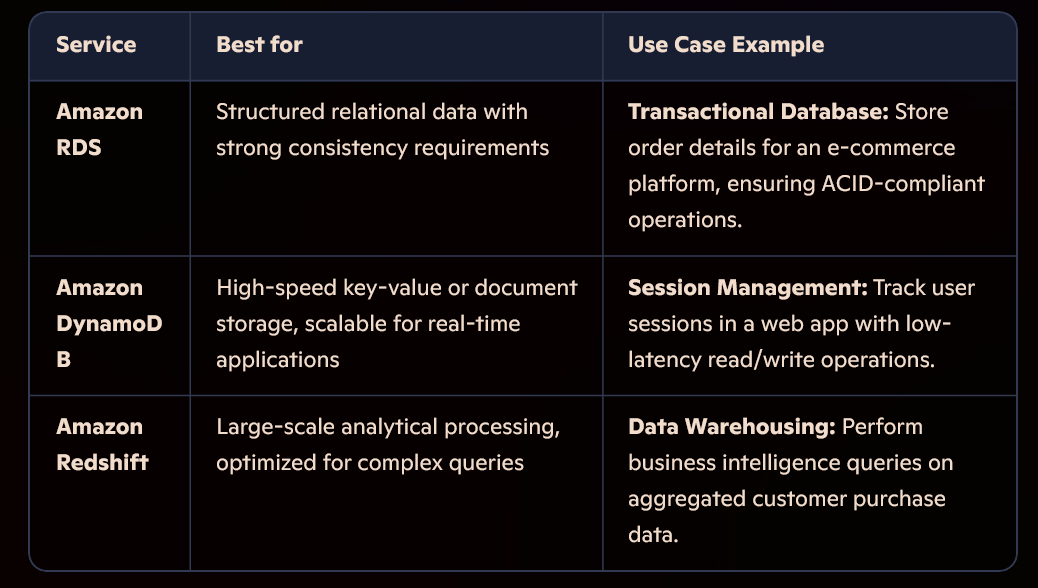

Comparison Across Pipeline Stages
- Data Collection & Storage → DynamoDB (fast reads/writes, unstructured or semi-structured data)
- Transactional Processing → RDS (structured relational data needing consistency)
- Batch Analysis & Reporting → Redshift (high-performance queries on large datasets).


###8. Create a DynamoDB table and insert 3 records manually. Then write a Lambda function that adds records when triggered by S3 uploads.

Ans-8.








###9. What is serverless computing? Discuss pros and cons of using AWS Lambda for data pipelines.

Ans-9. **What is Serverless Computing?**

Serverless computing is a cloud computing model where developers build and run applications without managing underlying infrastructure. Instead of provisioning servers manually, cloud providers dynamically allocate resources as needed. Applications scale automatically, and you only pay for execution time.

AWS Lambda is a prime example of serverless computing—it executes code in response to triggers without requiring users to manage servers.

####**Pros & Cons of Using AWS Lambda for Data Pipelines**

**✅ Pros**

1. Cost Efficiency: Pay only for execution time; no cost when idle.

2. Scalability: Handles spikes in data automatically without manual intervention.

3. Event-Driven Processing: Ideal for real-time ingestion, triggered by S3 uploads, API calls, or stream events.

4. Reduced Operational Overhead: No need to manage infrastructure—just focus on writing logic.

5. Built-in Security & IAM: Granular control over permissions using AWS Identity & Access Management (IAM).

**❌ Cons**

1. Execution Time Limits: Max runtime is 15 minutes, making it unsuitable for long-running batch jobs.

2.  Cold Starts: Lambda functions experience slight delays during initialization, impacting low-latency applications.

3. Limited Storage: Max memory is 10 GB, restricting complex data processing tasks.

4.  Complex Debugging: Debugging distributed serverless workflows can be harder than traditional server-based models.

5. Concurrency Limits: Burst scaling is limited, and exceeding concurrency limits can throttle execution.

####**When to Use AWS Lambda in a Data Pipeline**

🔹 ETL (Extract, Transform, Load): Process and clean incoming data before sending it to a storage solution.

🔹 Event-Driven Ingestion: Automatically store incoming files when uploaded to Amazon S3.

🔹 Real-Time Streaming: Process live data feeds from Amazon Kinesis or IoT devices.




###10. Create a Lambda function triggered by S3 uploads that logs file name, size, and timestamp to Cloudwatch. Share code and a log screenshot.

Ans-10. AWS Lambda Function to Log S3 Uploads to CloudWatch

This function will:

✅ Trigger on new S3 file uploads

✅ Log file name, size, and timestamp to CloudWatch

**Step 1: Lambda Function Code (lambda_function.py)**



In [6]:
import json
import logging

logger = logging.getLogger()
logger.setLevel(logging.INFO)

def lambda_handler(event, context):
    for record in event['Records']:
        file_name = record['s3']['object']['key']
        file_size = record['s3']['object']['size']
        event_time = record['eventTime']

        log_message = f"File uploaded: {file_name}, Size: {file_size} bytes, Timestamp: {event_time}"
        logger.info(log_message)

    return {"statusCode": 200, "body": json.dumps("Logged S3 file details successfully")}

**Step 2: Set Up AWS Lambda**

1️⃣ Go to AWS Lambda, create a function, and upload lambda_function.py.

2️⃣ Assign a role with CloudWatch Logs & S3 Read permissions.

**Step 3: Add an S3 Event Trigger**

1. In AWS Lambda, select Add Trigger → Choose S3.

2. Select the bucket to monitor.

3. Choose PUT event (fires when a new file is uploaded).

**Step 4: View Logs in CloudWatch**

    Run this AWS CLI command to fetch logs:
    aws logs tail /aws/lambda/YourLambdaFunctionName


Or check logs in AWS Console → CloudWatch Logs.

Example Log Entry

    INFO  File uploaded: data.csv, Size: 1048576 bytes, Timestamp: 2025-05-23T01:35:00Z


###11. Use AWS Glue to crawl your S3 dataset, create a Data Catalog table, and run a Glue job to convert CSV data to parquet. Share job code and output location.

Ans-11. To accomplish this using AWS Glue, we will follow these steps:

✅ Crawl the S3 dataset to create a Data Catalog table

✅ Run an AWS Glue job to convert CSV data to Parquet format

**Step 1: Create an AWS Glue Crawler**

1️⃣ Navigate to AWS Glue in the console.

2️⃣ Select Crawlers → Add crawler

3️⃣ Set:

- Data source: S3 bucket (where CSV files are stored)

- IAM Role: Choose or create an appropriate role with permissions

4️⃣ Run the crawler to populate the AWS Glue Data Catalog table.

**Step 2: Create an AWS Glue Job**

Now, let's write a PySpark script for the AWS Glue job (glue_convert_csv_to_parquet.py).

import sys
from awsglue.transforms import *
from awsglue.utils import getResolvedOptions
from pyspark.context import SparkContext
from awsglue.context import GlueContext
from awsglue.job import Job

args = getResolvedOptions(sys.argv, ['JOB_NAME'])
sc = SparkContext()
glueContext = GlueContext(sc)
spark = glueContext.spark_session
job = Job(glueContext)
job.init(args['JOB_NAME'], args)

# Read data from Glue Catalog
input_df = glueContext.create_dynamic_frame.from_catalog(
    database="your_database",
    table_name="your_table"
)

# Convert DynamicFrame to Spark DataFrame
df = input_df.toDF()

# Write data in Parquet format to S3
output_path = "s3://your-output-bucket/parquet/"
df.write.parquet(output_path, mode="overwrite")

job.commit()


**Step 3: Run AWS Glue Job**

1️⃣ Go to AWS Glue → Jobs → Create job

2️⃣ Select Glue Spark ETL engine

3️⃣ Upload glue_convert_csv_to_parquet.py

4️⃣ Specify:

- IAM Role with S3 write permissions

- Output Location: s3://your-output-bucket/parquet/

5️⃣ Run the job and verify output.

**Step 4: Verify Output in S3**

* Run the AWS CLI command to list Parquet files:

    aws s3 ls s3://your-output-bucket/parquet/

Next Steps

✅ Optimize Parquet format by adding compression (e.g., Snappy)

✅ Use AWS Athena to query the Parquet data efficiently




###12.  Explain the difference between Kinesis Data Streams, Kinesis Firehose, and Kinesis Data Analytics. Provide a real-world example of how each would be used.

Ans-12. Amazon Kinesis offers multiple services for real-time data processing, each designed for different use cases:

##**1. Kinesis Data Streams**

**Best for: Real-time event ingestion and processing**

- Use Case: High-speed log and event data ingestion from multiple sources for real-time analytics.

- How it works: Data producers continuously push records to a Kinesis stream. Consumers (e.g., Lambda, EC2, or custom applications) process the data in real time.

- Example: A ride-sharing app ingests GPS location updates from thousands of drivers, enabling real-time tracking for customers.

##**2. Kinesis Data Firehose**

**Best for: Streaming data delivery to storage or analytics services**

- Use Case: Capture incoming log files, transform the data, and store them in Amazon S3, Redshift, or Elasticsearch.

- How it works: Firehose automatically buffers, compresses, and loads streaming data into a predefined destination.

- Example: A cybersecurity firm streams firewall logs using Firehose, storing them in Amazon S3 for compliance and post-incident analysis.

##**3. Kinesis Data Analytics**

**Best for: Real-time SQL-based data analytics**

- Use Case: Detect anomalies or generate live insights from streaming data.

- How it works: Kinesis Data Analytics allows users to query and analyze streaming data using SQL without complex infrastructure.

- Example: An e-commerce site tracks customer actions (clicks, add-to-cart events) and uses Kinesis Data Analytics to identify abandoned carts in real time, triggering email reminders to users.




###13. What is columnar storage and how does it benefit Redshift performance for analytics workloads ?

Ans-13. **Columnar storage** is a data storage technique where values from the same column are stored together, rather than storing entire rows. Unlike traditional row-based storage (where each record is written sequentially), columnar storage optimizes reading by grouping similar data types.

**How Redshift Uses Columnar Storage for Analytics Performance**

Amazon Redshift leverages columnar storage to significantly enhance performance for analytics workloads. Here's how:

**✅ Efficient Scanning:**

- Queries often need only a few columns, not entire rows.

- Redshift reads only relevant columns, reducing I/O overhead.

**✅ Better Compression:**

- Similar data types stored together allow better compression algorithms (e.g., Snappy, LZO).

- Smaller storage footprint = faster data retrieval.

**✅ Optimized Aggregations:**

- Since data is structured column-wise, Redshift can quickly process sum, average, count, etc. without scanning full rows.

* - Speeds up queries on large datasets.

**✅ Parallel Processing:**

- Redshift distributes column chunks across nodes for high-speed parallel execution.

- Reduces query execution time for complex analytics.

####**Real-World Use Case**

* A retail company analyzing customer purchases in Redshift:

- Instead of scanning billions of rows, Redshift only loads relevant columns (e.g., purchase date, customer ID, amount).

- Faster insights on sales trends, customer behavior, and revenue forecasting.







###14. Load a CSV file from S3 into Redshift using the COPY command. Share table schema, command used, and sample output from a query.

Ans-14. Loading data from Amazon S3 into Amazon Redshift using the COPY command is a very common and efficient way to ingest large datasets. Here's how you can do it, including the table schema, COPY command, and a sample query output.

###**Prerequisites:**

1. **An Amazon Redshift Cluster:** You need an active Redshift cluster.

2. **An Amazon S3 Bucket:** Your CSV file must be in an S3 bucket.

3. **IAM Role:** A critical component. Redshift needs permission to read from your S3 bucket. You'll need to create an IAM role with AmazonS3ReadOnlyAccess (or a more restrictive policy if preferred) and attach it to your Redshift cluster. The ARN of this role will be used in the COPY command.

4. **CSV File:** A CSV file in your S3 bucket. For this example, let's assume a file named **my_data.csv in your S3 bucket s3://your-s3-bucket/data/my_data.csv**.

Example Scenario: Loading Sales Data

Let's imagine we have a sales table with the following columns: sale_id, product_name, quantity, price, sale_date.

1. Sample my_data.csv in S3:

          1,Laptop,2,1200.00,2024-01-15
          2,Mouse,5,25.00,2024-01-15
          3,Keyboard,1,75.50,2024-01-16
          4,Monitor,2,300.00,2024-01-16
          5,Webcam,3,50.00,2024-01-17

2. Table Schema (SQL DDL):

First, connect to your Redshift cluster using a SQL client (e.g., DBeaver, SQL Workbench/J, or the Redshift Query Editor in the AWS Console). Then, create the table:

          CREATE TABLE sales (
    sale_id INT IDENTITY(1,1), -- Auto-incrementing primary key
    product_name VARCHAR(255),
    quantity INT,
    price DECIMAL(10, 2),
    sale_date DATE
);

* **sale_id INT IDENTITY(1,1):** This creates an auto-incrementing integer column, useful if your CSV doesn't have a unique ID or you want Redshift to generate one. If your CSV already has a sale_id column, you can simply define it as sale_id INT.

* **VARCHAR(255):** A good default for text fields. Adjust length as needed.
DECIMAL(10, 2): For monetary values, allowing 10 digits in total with 2 decimal places.

* **DATE:** For dates.

3. COPY Command:

Now, execute the COPY command in your Redshift SQL client. Replace your-s3-bucket and arn:aws:iam::xxxxxxxxxxxx:role/YourRedshiftS3AccessRole with your actual values.

        COPY sales (sale_id, product_name, quantity, price, sale_date)
        FROM 's3://your-s3-bucket/data/my_data.csv'
        IAM_ROLE 'arn:aws:iam::xxxxxxxxxxxx:role/YourRedshiftS3AccessRole'
        CSV
        DELIMITER ','
        IGNOREHEADER 0; -- Set to 1 if your CSV has a header row

####**Explanation of COPY Command Parameters:**

* **sales (sale_id, product_name, quantity, price, sale_date):** Specifies the target table and the order of columns in the CSV file that map to the table columns.

* **Important:** Ensure the order here matches the order in your CSV file. If your CSV has a header, you might not need to list the columns explicitly if they match the table column names, but it's good practice for clarity.

* **FROM 's3://your-s3-bucket/data/my_data.csv':** The S3 path to your CSV file. You can also specify a folder (e.g., 's3://your-s3-bucket/data/') to load all files within that folder.

* **IAM_ROLE 'arn:aws:iam::xxxxxxxxxxxx:role/YourRedshiftS3AccessRole':** The ARN of the IAM role that grants Redshift permission to read from S3.

* **CSV:** Specifies that the source data is in CSV format.

* **DELIMITER ',':** Specifies that the values in the CSV are separated by commas.

* **IGNOREHEADER 0:** Tells Redshift not to ignore any header rows. If your my_data.csv had a header like sale_id,product_name,..., you would set this to IGNOREHEADER 1.

####**Optional COPY Parameters (Commonly Used):**

* REGION 'us-east-1': If your S3 bucket is in a different region than your Redshift cluster.

* DATEFORMAT 'YYYY-MM-DD': If your date format is not the default.

* TIMEFORMAT 'YYYY-MM-DD HH:MI:SS': For timestamps.

* TRUNCATECOLUMNS: Truncates data that exceeds the column's defined length (be careful with this, as it can lead to data loss).

* FILLRECORD: Fills missing trailing columns with nulls.

* EMPTYASNULL: Loads empty strings as NULL.

* BLANKSASNULL: Loads blank spaces as NULL.

* GZIP (or LZOP, BZIP2): If your S3 file is compressed.

* MAXERROR 0: Stops the COPY operation if any errors occur (default allows some errors).

* STATUPDATE ON: Updates statistics for the table after the load (good for query optimizer).

4. Sample Output from a Query:

After the COPY command completes successfully, you can query your sales table to verify the data.   

    SELECT * FROM sales;

 **Sample Query Output:**

 sale_id | product_name | quantity |  price | sale_date
---------+--------------+----------+--------+------------
       1 | Laptop       |        2 | 1200.00| 2024-01-15
       2 | Mouse        |        5 |   25.00| 2024-01-15
       3 | Keyboard     |        1 |   75.50| 2024-01-16
       4 | Monitor      |        2 |  300.00| 2024-01-16
       5 | Webcam       |        3 |   50.00| 2024-01-17   

 This demonstrates the successful loading of data from S3 into your Redshift table.      

###15. What is the role of the AWS Glue Data Catalog in Athena? How does schema-on-read work?

Ans-15. **AWS Glue Data Catalog in Athena**
Amazon Athena is a serverless query service that lets you analyze structured and unstructured data stored in Amazon S3 using SQL. However, Athena needs a way to understand the structure of the data before querying—this is where AWS Glue Data Catalog plays a crucial role.

✅ What AWS Glue Data Catalog Does in Athena:

- Acts as a metadata repository that stores schema definitions for datasets in S3.

- Allows Athena to read structured data without requiring prior data transformation.

- Supports table definitions, column types, and partitioning for efficient querying.

- Enables easy schema evolution, making it adaptable for changing data formats overtime.

**How Schema-on-Read Works**

**Unlike traditional databases that use schema-on-write (forcing data to fit a predefined structure before storing), Athena applies a schema-on-read approach:**

🔹 Data remains in raw format in S3 (e.g., JSON, CSV, Parquet).

🔹 Athena reads & interprets schema dynamically at query time based on definitions in AWS Glue Data Catalog.

🔹 No need for upfront data transformation—only specify schema when querying.

**📌 Example:**

Imagine you have raw JSON logs stored in S3. With schema-on-read, you don’t need to pre-define tables before storing data. Instead, when running an Athena query, Glue Catalog interprets the structure, enabling immediate SQL-based analysis.



###16. Create an Athena table from S3 data using Glue Catalog. Run a query and share the SQL + result screenshot.

Ans-16. To create an Athena table from S3 data using the Glue Catalog and then query it, you'll typically follow these steps:

1. Prepare your data in S3.

2. Define the table in AWS Glue Data Catalog. This can be done either by running an AWS Glue Crawler (which automatically infers schema) or by manually creating an external table definition directly in Athena using SQL. The latter is often quicker for known schemas.

3. Query the table in Athena.

**Step 1: Create a Glue Table for Athena**

- Ensure your dataset is stored in an S3 bucket in a structured format like CSV or Parquet.
- In AWS Glue, create a new database (or use an existing one).
- Define a Glue table by using the Crawler to automatically infer schema or manually specifying column definitions.
- Set the table format (e.g., CSV, Parquet), define the S3 location, and ensure it's accessible by Athena.

**Step 2: Query Data in Athena**

* Once your Glue table is ready, you can query it in Athena. Here's an example SQL query:
                         
        SELECT * FROM glue_database.glue_table LIMIT 10;

Replace glue_database with the actual Glue database name and glue_table with the table name.

**Step 3: Run Query & Capture Results**

- Navigate to AWS Athena, ensure it’s pointing to the correct Glue Catalog.
- Run your SQL query and view the results.
- To capture a screenshot, take a snapshot of the results page and save it.


    



###17. Describe how Amazon Quicksight supports business intelligence in a serverless data architecture. What are SPICE and embedded dashboards?

Ans-17. Amazon QuickSight plays a pivotal role in enabling Business Intelligence (BI) in a serverless data architecture on AWS. It integrates seamlessly with various serverless data services, providing a fully managed, scalable, and cost-effective BI solution without the need for infrastructure provisioning or management.

####How Amazon QuickSight Supports BI in a Serverless Data Architecture:

* **Serverless by Nature:** QuickSight itself is a serverless BI service. This means users don't need to set up, configure, or manage servers for their BI environment. AWS handles all the underlying infrastructure, scaling automatically to accommodate hundreds of thousands of users and varying data loads. This eliminates operational overhead and allows businesses to focus solely on data analysis and insights.

* **Native Integration with Serverless Data Sources:** QuickSight has deep, native integration with key AWS serverless data services, forming the backbone of a serverless data lake or data warehouse:

* **Amazon S3 (Data Lake Storage):** QuickSight can directly connect to data stored in Amazon S3, which is the foundational storage for serverless data lakes.

* **Amazon Athena (Serverless Query Engine):** QuickSight frequently uses Athena as a query engine for data residing in S3. Athena is a serverless, interactive query service that makes it easy to analyze data in S3 using standard SQL, without managing any infrastructure. This allows QuickSight to visualize data directly from your data lake.

* **AWS Glue (Serverless ETL and Catalog):** QuickSight leverages the AWS Glue Data Catalog to discover and understand the schema of data in S3. AWS Glue also provides serverless ETL (Extract, Transform, Load) capabilities, allowing data to be prepared and transformed before being analyzed in QuickSight.

* **Amazon Redshift Serverless (Serverless Data Warehouse):** For analytical workloads requiring a more traditional data warehousing experience, QuickSight can connect to Amazon Redshift Serverless, which provides a fully managed, automatically scaling data warehousing solution.

* **Amazon Aurora Serverless / Amazon RDS (Serverless Databases):** QuickSight can also connect to transactional data stored in serverless relational databases like Amazon Aurora Serverless or other Amazon RDS instances.
Scalability and Performance with SPICE: QuickSight's architecture, including its SPICE engine, is designed for high performance and scalability in a serverless context. It can handle large datasets and thousands of concurrent users without performance degradation, abstracting away the complexity of managing compute resources.

* **Pay-per-Session Pricing:** QuickSight offers a pay-per-session pricing model for readers (users consuming dashboards), which aligns well with the cost-efficiency goals of serverless architectures. You only pay for actual usage, eliminating the need for expensive upfront licenses or over-provisioning.

* **Simplified Management and Self-Service BI:** With no servers to manage, IT teams are freed from infrastructure maintenance. This allows business users and analysts to leverage QuickSight's intuitive interface for self-service BI, creating dashboards and analyses without needing deep technical expertise or intervention from IT.

* **Embedded Analytics:** QuickSight's ability to embed dashboards directly into applications further enhances the serverless BI experience by making insights readily available within business workflows, without requiring users to navigate to a separate BI tool.

####What are SPICE and Embedded Dashboards?

1. **SPICE (Super-fast, Parallel, In-memory Calculation Engine)**

SPICE is Amazon QuickSight's proprietary in-memory data store and calculation engine. It's a fundamental component that powers QuickSight's fast, interactive dashboards and analyses.

* **How it Works:**

 When you import data into QuickSight, you can choose to store it in SPICE. SPICE creates a cached snapshot of your data in a columnar format, optimized for analytical queries. When users interact with dashboards or visuals, QuickSight queries the data directly from SPICE rather than sending queries to the underlying data source (like S3, Athena, or Redshift) each time.

####**Benefits:**

* **Blazing Fast Performance:** By caching data in-memory and using parallel processing, SPICE significantly reduces query response times, providing a highly interactive user experience even with large datasets.

* **Reduced Load on Source Databases:** Since queries are served from SPICE, the burden on your source databases or data lakes is minimized, freeing up their resources for other operations.

* **High Concurrency:** SPICE automatically scales to support thousands of concurrent users querying the same dataset without performance degradation.
Cost Efficiency: For frequently accessed data, using SPICE can be more cost-effective than repeatedly querying external data sources, especially those with per-query pricing (like Athena). You pay for the SPICE capacity you use, not for individual queries after the data is ingested.

* **Data Freshness:** SPICE datasets can be refreshed on a schedule (e.g., hourly, daily) or on demand to ensure data freshness.

2. **Embedded Dashboards**

QuickSight's embedded dashboards feature allows you to seamlessly integrate interactive dashboards, visualizations, and even the full QuickSight authoring experience directly into your own web applications, portals, or internal tools.

**How it Works:**

Instead of requiring users to log into the QuickSight console to view insights, you can generate an embeddable URL or use the QuickSight JavaScript SDK to embed dashboards directly into your application's user interface. QuickSight handles authentication and authorization, often integrating with your existing identity providers.

####**Benefits:**

* **Contextual Analytics:** Provides insights directly within the context of your users' workflow, reducing context switching and making data-driven decisions more immediate.

* **Enhanced User Experience:** Delivers a seamless and integrated analytics experience that looks and feels like part of your application, customizable with your branding and themes.

* **Monetization Opportunities:** For ISVs (Independent Software Vendors) or SaaS providers, embedding analytics can be a way to differentiate their product, offer new premium features, and potentially create new revenue streams.
Scalability and Security: Leverages QuickSight's serverless architecture for high scalability and robust security features like row-level and column-level security to ensure users only see data they are authorized to access.

* **Reduced Development Effort:** Eliminates the need to build custom analytics and visualization capabilities from scratch, significantly accelerating development cycles.

**In summary,** Amazon QuickSight's serverless architecture, deep AWS integrations, SPICE engine, and embedded capabilities make it a powerful and agile BI solution for modern, cloud-native data architectures, especially those built around data lakes and serverless services.

###18. Connect Quicksight to Athena or Redshift and build a dashboard with at least one calculated field and one filter. Share a screenshot of your final dashboard.

Ans-18. the process of connecting Amazon QuickSight to Athena or Redshift and building a dashboard with a calculated field and a filter.

 **Step 1: Connect QuickSight to Athena or Redshift**

- Set Up a Data Source
- In QuickSight, go to Manage Data and click New Data Set.
- Select Amazon Athena or Amazon Redshift as the data source.
- For Athena:
- Choose the database from Glue Catalog.
- Select the table and Import or use direct query.
- For Redshift:
- Provide the Redshift cluster connection details.
- Choose the schema and table.
- Prepare the Data Set
- Click Edit Dataset and define fields as needed.

**Step 2: Create a Dashboard**
- Add a Visual
- Navigate to Analysis.
- Choose a visualization type (table, bar chart, pie chart, etc.).
- Drag fields onto the visual to configure dimensions and metrics.
- Create a Calculated Field
- Click on Add Calculated Field.
- Example:
revenue_per_product = total_revenue / num_products
- Apply the calculation to a metric in your visual.
- Add a Filter
- Click Filter > Create Filter.
- Example:
- Filter sales data by region or date range.
- Apply it to your visual.

**Step 3: Save & Share**
- Once the dashboard is built, you can publish it.
- To capture a screenshot, use the snipping tool or your system’s built-in screenshot function.



###19. Explain how AWS CloudWatch and CloudTrail differ. IN a data analytics pipeline, what role does each play in monitoring, auditing, and troubleshooting?

Ans-19. AWS CloudWatch and CloudTrail serve distinct roles in monitoring and auditing within a data analytics pipeline. Here’s how they differ and what they contribute:

 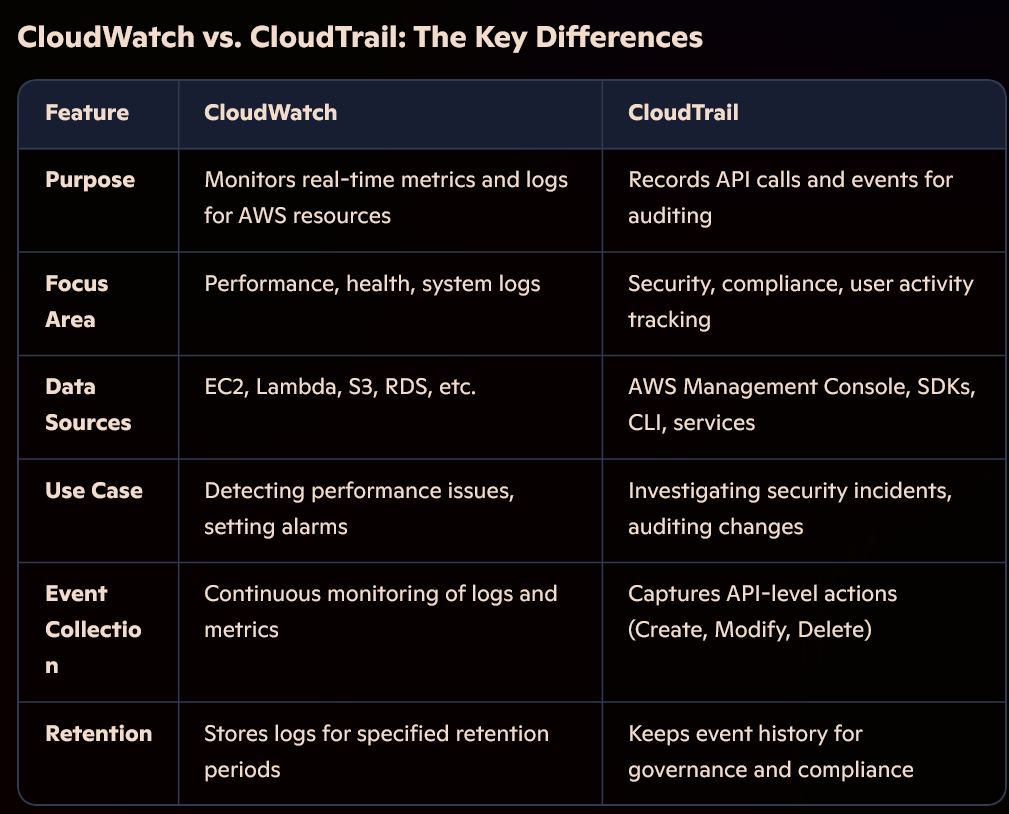





Roles in a Data Analytics Pipeline
Both services play complementary roles in monitoring, auditing, and troubleshooting:
1. Monitoring Performance (CloudWatch)
- Tracks metrics for ETL jobs, database queries, and compute instances.
- Detects latency issues in data ingestion or processing delays in Spark, Glue, or Redshift.
- Sends alerts when thresholds (e.g., high CPU on an EMR cluster) are breached.
2. Auditing & Governance (CloudTrail)
- Logs user actions, tracking who modified data sources or pipeline configurations.
- Ensures compliance by recording access permissions and API calls (e.g., modifying Glue tables or Athena queries).
- Identifies anomalies in security-sensitive operations (e.g., unauthorized access to Redshift).
3. Troubleshooting Failures
- CloudWatch Logs: Helps analyze failures by checking service-specific logs (e.g., Lambda execution errors or Glue job failures).
- CloudTrail Events: Useful for root cause analysis—who changed the pipeline settings, when, and what was affected.
- Together, they help identify whether an issue is due to performance bottlenecks (CloudWatch) or unauthorized changes (CloudTrail).


###20. Describe a complete end-to-end data analytics pipeline using AWS services. Include services for data ingestion, storage, transformation, querying, and visualization. (Example: S3 → Lambda → Glue → Quicksight)Explain why you would choose each service for the stage it’s used in?

Ans-20. A complete end-to-end data analytics pipeline using AWS services provides a robust, scalable, and cost-effective solution for processing, analyzing, and visualizing large datasets. Here's a common architecture, explaining the choice of each service:

**Here's a complete end-to-end data analytics pipeline using AWS services, covering data ingestion, storage, transformation, querying, and visualization:**

1. **Data Ingestion → AWS Lambda / Kinesis / AWS Glue**

- Handles real-time and batch ingestion efficiently.

- Lambda: Useful for event-driven ingestion, processing incoming data and storing it in S3.

- Kinesis: Best for real-time streaming analytics when ingesting logs, IoT data, or clickstream data.

- Glue Crawlers: Ideal for batch ingestion, automatically discovering and cataloging schema from structured or semi-structured data sources.

2. **Storage → Amazon S3 / Redshift / DynamoDB**

- Supports structured, semi-structured, and unstructured storage.

- S3: Serves as a central data lake, storing raw and processed files (CSV, Parquet, JSON).

- Redshift: Best for structured analytics and OLAP workloads, enabling fast SQL-based querying.

- DynamoDB: Perfect for NoSQL analytics, such as event tracking or recommendation engines.

3. **Data Transformation → AWS Glue / EMR / Lambda**

- Processes and cleans raw data into usable formats.

- Glue ETL: Great for large-scale data transformation, using Spark-based workflows.

- EMR (Hadoop/Spark): Used for big data analytics, handling large-scale distributed processing.

- Lambda: Ideal for lightweight transformations like cleaning logs before storage.

4. **Querying → Amazon Athena / Redshift**

- Enables fast querying for structured and semi-structured data.

- Athena: Best for serverless querying on S3, analyzing Parquet and JSON files with SQL.

- Redshift: Ideal for complex analytical queries, aggregating large datasets with columnar storage.

5. **Visualization → Amazon QuickSight**

- Why? Provides business insights through dashboards and reports.

- Connects seamlessly to Athena, Redshift, and DynamoDB.

- Supports calculated fields, interactive filtering, and AI-powered anomaly detection.

###End-to-End Flow

- Raw Data Ingestion → Lambda, Kinesis, Glue Crawlers
- Storage → S3, Redshift, DynamoDB
- Transformation → Glue ETL, EMR, Lambda
- Querying → Athena, Redshift
- Visualization → QuickSight



